## PCA
PCA(Principal Component Analysis) is a dimensionality reduction method. It uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components

### Import data

In [1]:
import numpy as np

x=np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1])
y=np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])

### Compute mean and normalize

In [2]:
mean_x = np.mean(x)
mean_y = np.mean(y)
scaled_x = x - mean_x
scaled_y = y - mean_y
data=np.matrix([[scaled_x[i],scaled_y[i]] for i in range(len(scaled_x))])

### Let's see how the data looks like

/Users/tracy/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


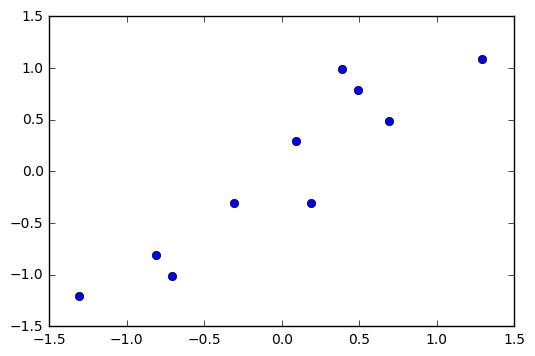

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(scaled_x, scaled_y, 'o')

In [4]:
cov = np.cov(scaled_x, scaled_y)

In [5]:
np.dot(np.transpose(data), data)

matrix([[ 5.549,  5.539],
        [ 5.539,  6.449]])

### Compute eigen-value and eigen-vector

In [6]:
eig_val, eig_vec = np.linalg.eig(cov)

### Add eigen-vector in the plot

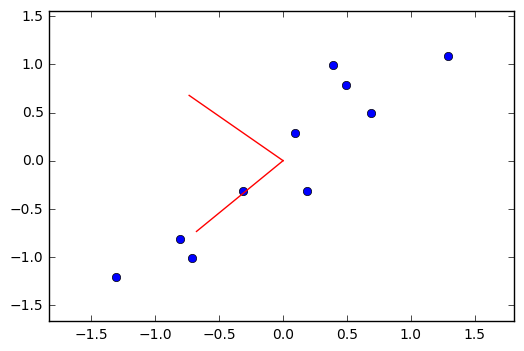

In [7]:
plt.plot(scaled_x, scaled_y, 'o')
xmin, xmax = scaled_x.min(), scaled_x.max()
ymin, ymax = scaled_y.min(), scaled_y.max()
dx = (xmax - xmin) * 0.2
dy = (ymax - ymin) * 0.2
plt.xlim(xmin - dx, xmax + dx)
plt.ylim(ymin - dy, ymax + dy)
plt.plot([eig_vec[:, 0][0], 0], [eig_vec[:, 0][1], 0], color='red')
plt.plot([eig_vec[:, 1][0], 0], [eig_vec[:, 1][1], 0], color='red')

In [8]:
new_data = np.transpose(np.dot(eig_vec, np.transpose(data)))
print new_data

[[ -8.39431238e-01   1.07495104e-01]
 [  1.78331085e+00   1.55202114e-03]
 [ -9.57814340e-01  -4.63456244e-01]
 [ -2.62749365e-01  -1.52193204e-01]
 [ -1.68726247e+00   7.31119496e-02]
 [ -8.95757526e-01  -2.48633173e-01]
 [  7.04568090e-02   3.56701329e-01]
 [  1.14457216e+00   4.64172582e-02]
 [  4.38046137e-01   1.77646297e-02]
 [  1.20662898e+00   2.61240329e-01]]


### Choose top k principal component

In [9]:
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:, i]) for i in range(len(eig_val))]
eig_pairs.sort(reverse = True)
feature = eig_pairs[0][1] #We only have two components, choose top 1

### Obtain dimensionality-reduced data

In [10]:
new_data_reduced = np.transpose(np.dot(feature, np.transpose(data)))

### Plot transformed data

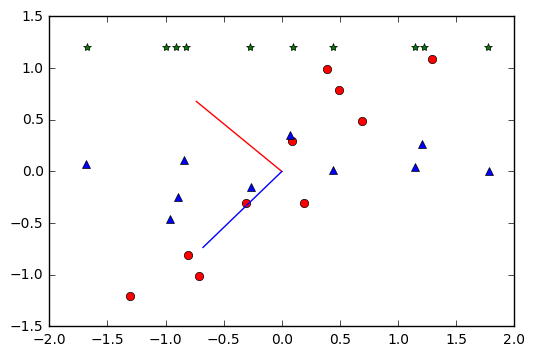

In [11]:
plt.plot(scaled_x, scaled_y, 'o', color='red')
plt.plot([eig_vec[:, 0][0], 0], [eig_vec[:, 0][1], 0], color='red')
plt.plot([eig_vec[:, 1][0], 0], [eig_vec[:, 1][1], 0], color='blue')
plt.plot(new_data[:, 0], new_data[:, 1], '^', color='blue')
plt.plot(new_data_reduced[:, 0], [1.2]*10, '*', color='green')

### Put it together:

In [12]:
import numpy as np
def pca(X, k):
    #mean of each feature
    n_samples, n_features = X.shape
    mean_X = np.array([np.mean(X[:, i]) for i in range(n_features)])
    #normalize
    norm_X = X - mean_X
    #scatter matrix
    scatter_matrix = np.dot(np.transpose(norm_X), norm_X)
    #Calculate eigenvectors and eigenvalues
    eig_val, eig_vec = np.linalg.eig(scatter_matrix)
    eig_pairs = [(np.abs(eig_val[i]), eig_vec[:, i]) for i in range(n_features)]
    #sort eig_vec based on eig_val from highest to lowest
    eig_pairs.sort(reverse=True)
    #Select top k eig_vec
    feature = np.array([ele[1] for ele in eig_pairs[:k]])
    #generate new data
    data = np.dot(norm_X, np.transpose(feature))
    return data